In [34]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
PATH = './p1_data/'
train_data_name = [str(i) + "_" + str(j) + ".png" for i in range(1, 41) for j in range(1, 10)]
test_data_name = [str(i) + "_10" + ".png" for i in range(1, 41)]

train_x = [cv2.imread(PATH + train_data, cv2.IMREAD_GRAYSCALE) for train_data in train_data_name]
train_x = np.array(train_x).reshape(360, -1)
train_y = [i for i in range(1, 41) for _ in range(1, 10)]
train_y = np.array(train_y)

test_x = [cv2.imread(PATH + test_data, cv2.IMREAD_GRAYSCALE) for test_data in test_data_name]
test_x = np.array(test_x).reshape(40, -1)
test_y = [i for i in range(1, 41)]
test_y = np.array(test_y)
    

In [6]:
sample = cv2.imread(PATH + "1_1.png", cv2.IMREAD_GRAYSCALE)
print("Size of training data:", len(train_x))
print("Size of test data:", len(test_x))
print("Image shape:", sample.shape)
print("Vector size:", train_x[0].shape)

Size of training data: 360
Size of test data: 40
Image shape: (56, 46)
Vector size: (2576,)


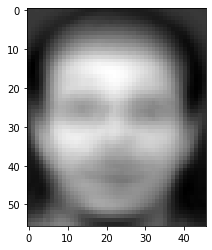

In [8]:
mean_face = train_x.mean(axis=0)
plt.imshow(mean_face.reshape(56,46), cmap='gray')
plt.show()

(360, 2576)


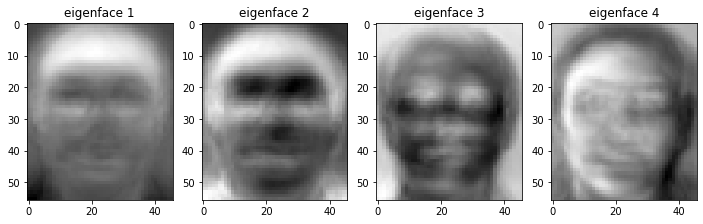

In [20]:
pca = PCA()
output = pca.fit(train_x - mean_face)
print(output.components_.shape)
eigenface_1 = (output.components_[0]).reshape(56,46)
eigenface_2 = (output.components_[1]).reshape(56,46)
eigenface_3 = (output.components_[2]).reshape(56,46)
eigenface_4 = (output.components_[3]).reshape(56,46)

plt.figure(figsize=(12,6))
plt.subplot(141)
plt.imshow(eigenface_1, cmap='gray')
plt.title("eigenface 1")
plt.subplot(142)
plt.imshow(eigenface_2, cmap='gray')
plt.title("eigenface 2")
plt.subplot(143)
plt.imshow(eigenface_3, cmap='gray')
plt.title("eigenface 3")
plt.subplot(144)
plt.imshow(eigenface_4, cmap='gray')
plt.title("eigenface 4")
plt.show()

(1, 360)


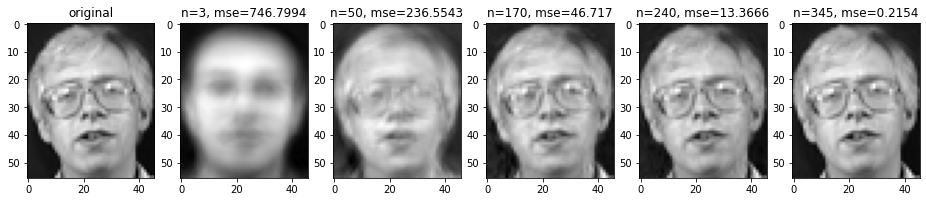

In [28]:
img = cv2.imread(PATH + "2_1.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(16,6))
plt.subplot(1, 6, 1)
plt.title("original")
plt.imshow(img.reshape(56,46), cmap='gray')

img_vec = img.reshape(1, -1)
img_dr = pca.transform(img_vec - mean_face)
print(img_dr.shape)

for j, i in enumerate([3, 50, 170, 240, 345]):
    img_recon = np.dot(img_dr[0,:i], output.components_[:i]) + mean_face
    mse = np.mean((img_recon - img_vec)**2)
    plt.subplot(1, 6, j+2)
    title = "n=" + str(i) + ", mse=" + str(np.round(mse, 4))
    plt.title(title)
    plt.imshow(img_recon.reshape(56,46), cmap = "gray")
plt.show()

In [36]:
train_x_dr = pca.transform(train_x - mean_face)
knn = KNeighborsClassifier()
param_k = {"n_neighbors":[1, 3, 5]}
clf = GridSearchCV(knn, param_k, cv=3) # conduct 3-fold cross validation

df = dict() 
for n in [3, 50, 170]:
    clf.fit(train_x_dr[:,:n], train_y)
    df['n =' + str(n)] = np.array(clf.cv_results_['mean_test_score']) 
    
df = pd.DataFrame.from_dict(df, orient = 'index')
df.index = ["n=3", "n=45", "n=140"]
df.columns = ['k=1','k=3','k=5']
print(df)

            k=1       k=3       k=5
n=3    0.650000  0.611111  0.561111
n=45   0.961111  0.900000  0.847222
n=140  0.955556  0.888889  0.822222


In [40]:
test_x_dr = pca.transform(test_x - mean_face)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x_dr[:,:45], train_y)
pred_y = knn.predict(test_x_dr[:,:45])
acc = accuracy_score(y_pred=pred_y, y_true=test_y)
print("The accuracy on testing set:", acc)

The accuracy on testing set: 0.925
